In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import sb_tools
from PIL import Image


In [2]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

In [3]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

# Load data

In [4]:
SB_env_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SB_env_tromsøflaket2018.xlsx',header=0, engine="openpyxl")
SB_position = SB_env_df.set_index('datetime').resample('60min').mean()


In [5]:
SP_env_df_20 = pd.read_csv('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_GPSExport_20.gps.csv', usecols=[1,2,4,5])
SP_env_df = pd.read_csv('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_GPSExport.gps.csv', usecols=[1,2,4,5])
SP_env_df = pd.concat([SP_env_df_20, SP_env_df])
# Get hourly values
SP_env_df['GPS_datetime']=pd.to_datetime(SP_env_df['GPS_date']+' '+SP_env_df['GPS_time'])
SP_position = SP_env_df.set_index('GPS_datetime').resample('60min').mean()

In [6]:
# get stations
SP_stations_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SeaPatchesStations.xlsx',header=0)
SP_lons = SP_stations_df['longitude (deg)']
SP_lats = SP_stations_df['latitude (deg)']
stn_num = SP_stations_df['Station']

In [7]:
fname_topo = "C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/NordNorgeTopo_tromsoflaket.xlsx"
projection = ccrs.PlateCarree()

In [8]:
times = pd.date_range(start=SP_position.index[1], end=SB_position.index[-1], freq='H')

In [13]:
im = []
SB_ind = 1
SP_ind = 1

# Add SB track
for t_ind in np.arange(len(times)):
    
    print('Working on ' +str(t_ind))
    # Find the index of the new time or use previous index.
    if np.any(SB_position.index==times[t_ind]):
        SB_ind = np.where(SB_position.index==times[t_ind])[0][0]
        if (SB_ind<1):
            SB_ind=1
        print('SB = ' + str(SB_ind))
    if np.any(SP_position.index==times[t_ind]):
        SP_ind = np.where(SP_position.index==times[t_ind])[0][0]
        print('SP = ' + str(SP_ind))
    fig = plt.figure(figsize=(12,10))
    
    # create map
    ax = sb_tools.plot_tromsoflaket(plt.axes, fname_topo, projection)
    # Add stations
    plt.plot(SP_lons, SP_lats, 'm*', label='SeaPatches Stations', markersize=10,transform=projection)
    for num in range(6,len(stn_num)):
        plt.text(SP_lons[num]-0.05, SP_lats[num]+0.04, 'Stn ' + str(stn_num[num]), fontsize=11,transform=projection)
    
    # Plot track up to time index
    plt.plot(SP_position['Longitude'][0:SP_ind],SP_position['Latitude'][0:SP_ind], '.-',color='green', label='SeaPatches Cruise track',transform=projection)
    plt.plot(SP_position['Longitude'][SP_ind],SP_position['Latitude'][SP_ind], 'o',color='green', markersize=12,transform=projection)
    
    plt.plot(SB_position['longitude (deg)'][0:SB_ind],SB_position['latitude (deg)'][0:SB_ind], '.-',color='blue', label='Sailbuoy track',transform=projection)
    plt.plot(SB_position['longitude (deg)'][SB_ind],SB_position['latitude (deg)'][SB_ind], 'o',color='blue', markersize=14,transform=projection)
   
    plt.text(16.2, 72, times[t_ind].strftime('%d %B %Y, %H:%M'), title_font)
    plt.legend(fontsize=12)
    
    plt.savefig('figure%d.png' % t_ind)
    plt.close()

Working on 0
SP = 1
Working on 1
SP = 2
Working on 2
SP = 3
Working on 3
SP = 4
Working on 4
SP = 5
Working on 5
SP = 6
Working on 6
SP = 7
Working on 7
SP = 8
Working on 8
SP = 9
Working on 9
SP = 10
Working on 10
SP = 11
Working on 11
SP = 12
Working on 12
SP = 13
Working on 13
SP = 14
Working on 14
SP = 15
Working on 15
SB = 1
SP = 16
Working on 16
SB = 1
SP = 17
Working on 17
SB = 2
SP = 18
Working on 18
SB = 3
SP = 19
Working on 19
SB = 4
SP = 20
Working on 20
SB = 5
SP = 21
Working on 21
SB = 6
SP = 22
Working on 22
SB = 7
SP = 23
Working on 23
SB = 8
SP = 24
Working on 24
SB = 9
SP = 25
Working on 25
SB = 10
SP = 26
Working on 26
SB = 11
SP = 27
Working on 27
SB = 12
SP = 28
Working on 28
SB = 13
SP = 29
Working on 29
SB = 14
SP = 30
Working on 30
SB = 15
SP = 31
Working on 31
SB = 16
SP = 32
Working on 32
SB = 17
SP = 33
Working on 33
SB = 18
SP = 34
Working on 34
SB = 19
SP = 35
Working on 35
SB = 20
SP = 36
Working on 36
SB = 21
SP = 37
Working on 37
SB = 22
SP = 38
Working o

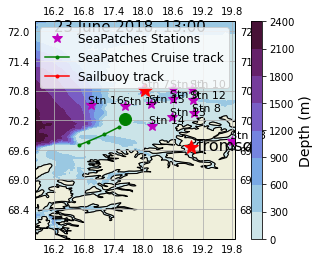

In [12]:
  # Add SB track


# create map
ax = sb_tools.plot_tromsoflaket(plt.axes, fname_topo, projection)
# Add stations
plt.plot(SP_lons, SP_lats, 'm*', label='SeaPatches Stations', markersize=10,transform=projection)
for num in range(6,len(stn_num)):
    plt.text(SP_lons[num]-0.05, SP_lats[num]+0.04, 'Stn ' + str(stn_num[num]), fontsize=11,transform=projection)

plt.plot(SP_position['Longitude'][0:SP_ind],SP_position['Latitude'][0:SP_ind], '.-',color='green', label='SeaPatches Cruise track',transform=projection)
plt.plot(SP_position['Longitude'][SP_ind],SP_position['Latitude'][SP_ind], 'o',color='green', markersize=12,transform=projection)
plt.plot(SB_position['longitude (deg)'][0:SB_ind],SB_position['latitude (deg)'][0:SB_ind], '.-',color='red', label='Sailbuoy track',transform=projection)
plt.plot(SB_position['longitude (deg)'][SB_ind],SB_position['latitude (deg)'][SB_ind], '*',color='red', markersize=14,transform=projection)

plt.text(16.2, 72, times[t_ind].strftime('%d %B %Y, %H:%M'), title_font)
plt.legend(fontsize=12)
plt.show()

In [ ]:
times[0].strftime('%d %B %Y, %H:%M')

I used ezgif.com and uploaded the series of pngs

In [ ]:
gif = mpimg.imread('SP_SB_survey.gif', 'r')
plt.imshow(gif)